In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install scikit-learn


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [26]:
df=pd.read_csv(r"C:\Users\ROHAN\Documents\Datascience\sonar data.csv")
df.tail()

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
202,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
203,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
204,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
205,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M
206,0.0260,0.0363,0.0136,0.0272,0.0214,0.0338,0.0655,0.1400,0.1843,0.2354,...,0.0146,0.0129,0.0047,0.0039,0.0061,0.0040,0.0036,0.0061,0.0115,M


In [68]:
#function for cofusion matrix
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['Rock', 'Mine']); ax.yaxis.set_ticklabels(['Rock', 'Mine']) 
    plt.show() 


In [21]:
df.shape

(207, 61)

In [22]:
df.describe()

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
count,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,...,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000
mean,0.029208,0.038443,0.043837,0.054053,0.075105,0.104599,0.121591,0.134677,0.177361,0.208245,...,0.016034,0.013472,0.010729,0.010917,0.009300,0.008181,0.007771,0.007947,0.007936,0.006523
std,0.023038,0.033040,0.038521,0.046583,0.055669,0.059247,0.061897,0.085340,0.118311,0.134741,...,0.012027,0.009628,0.007071,0.007310,0.007103,0.005719,0.005756,0.006485,0.006196,0.005038
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013300,0.016400,0.018900,0.024450,0.037700,0.066950,0.080600,0.080350,0.096750,0.111150,...,0.008350,0.007350,0.005050,0.005350,0.004100,0.004400,0.003700,0.003600,0.003650,0.003100
50%,0.022800,0.030800,0.034200,0.044100,0.062000,0.092100,0.105600,0.111900,0.152200,0.181000,...,0.013800,0.011500,0.009600,0.009300,0.007500,0.006800,0.005900,0.005800,0.006300,0.005300
75%,0.035800,0.048100,0.058200,0.065700,0.101050,0.134150,0.153050,0.169800,0.231500,0.269000,...,0.020700,0.016750,0.014900,0.014450,0.012100,0.010350,0.010350,0.010400,0.010350,0.008550
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [28]:
df['R'].value_counts()

R
M    111
R     96
Name: count, dtype: int64

In [31]:
df.replace(['R','M'],[0,1], inplace=True)

In [32]:
df.head()


,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,0
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,0
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,0
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,0
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,0


In [33]:
transform=preprocessing.StandardScaler()
x=transform.fit_transform(df)

In [34]:
df.groupby('R').mean()

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
R,,,,,,,,,,,,,,,,,,,,,
0,0.022524,0.030232,0.035879,0.041664,0.061680,0.096199,0.113767,0.117153,0.135584,0.158785,...,0.012198,0.010533,0.009673,0.009451,0.008581,0.007333,0.007708,0.006659,0.007058,0.006053
1,0.034989,0.045544,0.050720,0.064768,0.086715,0.111864,0.128359,0.149832,0.213492,0.251022,...,0.019352,0.016014,0.011643,0.012185,0.009923,0.008914,0.007825,0.009060,0.008695,0.006930


In [40]:
X=df.drop(columns='R', axis=1)
Y=df['R']

# Training and Testing the data

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(X,Y, test_size=0.2, random_state=2)

In [42]:
print(X.shape, X_train.shape, X_test.shape)

(207, 60) (165, 60) (42, 60)


In [43]:
df.isnull()

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
203,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
204,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
205,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [56]:
parameters ={'C':[0.01,0.1,1],
            'penalty':['l2'],
             'solver':['lbfgs']}


In [57]:
lr=LogisticRegression()
grid_search_lr=GridSearchCV(
    estimator=lr,
    param_grid=parameters,
    scoring='accuracy',
    cv=10
)
logreg_cv=grid_search_lr.fit(X_train, Y_train)

In [48]:
parametes={'C':[0.01,0.1,1],
           'penalty':['l2'],
           'solver':['newton-cg']
          }

In [53]:
lr1=LogisticRegression()
grid_search_lr=GridSearchCV(
    estimator=lr,
    param_grid=parametes,
    scoring='accuracy',
    cv=10
)
logreg_cv=grid_search_lr.fit(X_train, Y_train)

In [58]:
print("tuned hyperparameters:(best parameters) ", logreg_cv.best_params_)
print("accuracy:", logreg_cv.best_score_)

tuned hyperparameters:(best parameters)  {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy: 0.7632352941176471


In [59]:
#calculating the accuracy on test data
print("Accuracy of test data is:", logreg_cv.score(X_test, Y_test))

Accuracy of test data is: 0.8095238095238095


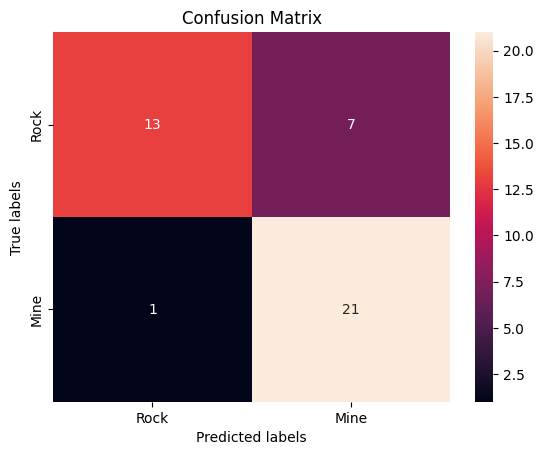

In [69]:
#building the confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
Y_hat=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,Y_hat)

In [78]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn=warn

# testing the data

In [81]:
input_data=(0.0039,0.0063,0.0152,0.0336,0.0310,0.0284,0.0396,0.0272,0.0323,0.0452,0.0492,0.0996,0.1424,0.1194,0.0628,0.0907,0.1177,0.1429,0.1223,0.1104,0.1847,0.3715,0.4382,0.5707,0.6654,0.7476,0.7654,0.8555,0.9720,0.9221,0.7502,0.7209,0.7757,0.6055,0.5021,0.4499,0.3947,0.4281,0.4427,0.3749,0.1972,0.0511,0.0793,0.1269,0.1533,0.0690,0.0402,0.0534,0.0228,0.0073,0.0062,0.0062,0.0120,0.0052,0.0056,0.0093,0.0042,0.0003,0.0053,0.0036)
input_data_as_numpy_array=np.asarray(input_data)
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
prediction=logreg_cv.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==0):
    print("The object is Rock")
else:
    print("The object is Mine")

[0]
The object is Rock


In [82]:
#calculating best parameters using Decision Tree Classifier
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

grid_search_tree=GridSearchCV(
    estimator=tree,
    param_grid=parameters,
    scoring='accuracy',
    cv=10
)
tree_cv=grid_search_tree.fit(X_train,Y_train)

In [83]:
print("tuned hyperparameters :(best parameters) ", tree_cv.best_params_)
print("accuracy :", tree_cv.best_score_)

tuned hyperparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 12, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'splitter': 'best'}
accuracy : 0.7882352941176471


In [84]:
print("Accuracy of test data:{:.5f}". format(tree_cv.score(X_test, Y_test)))

Accuracy of test data:0.73810


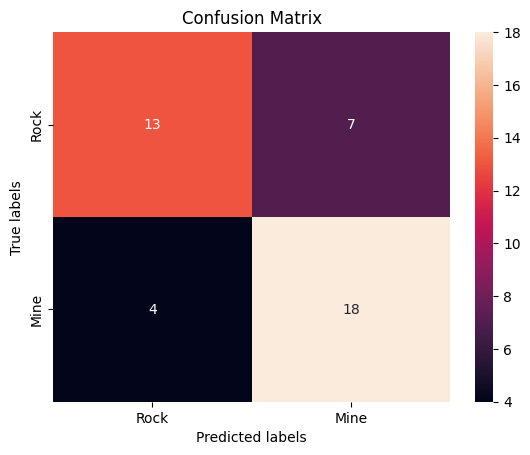

In [85]:
Y_hat=tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,Y_hat)

**calculating the best score using KNN neighbors**

In [86]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

In [87]:
grid_search_knn=GridSearchCV(
    estimator=KNN,
    param_grid=parameters,
    scoring='accuracy',
    cv=10
)
KNN_cv=grid_search_knn.fit(X_train, Y_train)

In [88]:
#calculating the best parameters
print("tunned hyperparameters:(best parameters):", KNN_cv.best_params_)
print("accuracy:", KNN_cv.best_score_)

tunned hyperparameters:(best parameters): {'algorithm': 'auto', 'n_neighbors': 1, 'p': 1}
accuracy: 0.8430147058823529


In [90]:
#calculating the accuracy of test data using method score
print("accuracy of test data:", KNN_cv.score(X_test, Y_test))

accuracy of test data: 0.8333333333333334


In [91]:
#calculating the best parameters using SVM
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC(random_state=12345)
grid_search_svm=GridSearchCV(
    estimator=svm,
    param_grid=parameters,
    scoring='accuracy',
    cv=10)
svm_cv=grid_search_svm.fit(X_train,Y_train)

In [92]:
print("tuned hyperparameters:(best parameters):", svm_cv.best_params_)
print("accuracy:", svm_cv.best_score_)

tuned hyperparameters:(best parameters): {'C': 1000.0, 'gamma': 0.03162277660168379, 'kernel': 'rbf'}
accuracy: 0.8488970588235294


In [93]:
#calculating the accuracy of test data using method score
print("accuracy of test data:",svm_cv.score(X_test,Y_test))

accuracy of test data: 0.8333333333333334


In [94]:
#calculating the best parameters
models={'KNeighbors':KNN_cv.best_score_,
        'DecisionTree':tree_cv.best_score_,
        'LogisticRegression':logreg_cv.best_score_,
        'Supportvector':svm_cv.best_score_}

bestalgorithm=max(models, key=models.get)
print("Best model is", bestalgorithm)
print("Best Algorithm score is", models[bestalgorithm])

if bestalgorithm == 'DecisionTree':
  print("Best params is:", tree_cv.best_params_)
if bestalgorithm =='KNeighbors':
  print("Best params is:", KNN_cv.best_params_)
if bestalgorithm=='SupportVector':
  print("Best params is:",svm_cv.best_params_)
if bestalgorithm =='LogisticRegression':
  print("Best params is:",logreg_cv.best_params_)


Best model is Supportvector
Best Algorithm score is 0.8488970588235294
